In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('./data/训练数据.csv')

In [4]:
data.reset_index(drop = True,inplace = True)
data

,date,黄金期货价格,论坛情绪值,美元指数,WTI原油,道琼斯指数,标普500指数,美联储利率,美国CPI月率,GPR,GEPU
0,2014-08-11,260.55,0.0,81.47,98.08,16569.98,1936.90,0.25,0.3,136.45,99.641198
1,2014-08-12,261.00,1.0,81.50,97.37,16560.54,1933.80,0.25,0.3,136.45,99.641198
2,2014-08-13,261.05,0.0,81.60,97.59,16651.80,1946.70,0.25,0.3,136.45,99.641198
3,2014-08-14,261.65,0.0,81.59,95.58,16713.58,1955.20,0.25,0.3,136.45,99.641198
4,2014-08-15,261.40,1.0,81.42,97.35,16662.91,1955.10,0.25,0.3,136.45,99.641198
...,...,...,...,...,...,...,...,...,...,...,...
2430,2024-08-05,559.94,1.0,102.69,72.94,38703.27,5186.33,5.50,-0.1,137.93,219.498876
2431,2024-08-06,554.18,0.0,102.97,73.20,38997.66,5240.03,5.50,-0.1,137.93,219.498876
2432,2024-08-07,556.06,0.0,103.20,75.23,38763.45,5199.50,5.50,-0.1,137.93,219.498876
2433,2024-08-08,556.10,1.0,103.21,76.19,39446.49,5319.31,5.50,-0.1,137.93,219.498876


In [5]:
data['论坛情绪值0'] = data['论坛情绪值']
tag = 0 # 0为不改变，1为改变
states = data.loc[0,'论坛情绪值']   #首次状态值
for i in range(len(data)-1):
    if data.loc[i+1,'论坛情绪值'] != states:
        tag = tag + 1
        if tag == 3:
            states = data.loc[i+1,'论坛情绪值']
            tag = 0
        else:
            data.loc[i+1,'论坛情绪值'] = states
    else:
        tag = 0
        states = data.loc[i+1,'论坛情绪值']

In [6]:
data['黄金期货价格'] = data['黄金期货价格'].apply(np.log)
data

,date,黄金期货价格,论坛情绪值,美元指数,WTI原油,道琼斯指数,标普500指数,美联储利率,美国CPI月率,GPR,GEPU,论坛情绪值0
0,2014-08-11,5.562795,0.0,81.47,98.08,16569.98,1936.90,0.25,0.3,136.45,99.641198,0.0
1,2014-08-12,5.564520,0.0,81.50,97.37,16560.54,1933.80,0.25,0.3,136.45,99.641198,1.0
2,2014-08-13,5.564712,0.0,81.60,97.59,16651.80,1946.70,0.25,0.3,136.45,99.641198,0.0
3,2014-08-14,5.567008,0.0,81.59,95.58,16713.58,1955.20,0.25,0.3,136.45,99.641198,0.0
4,2014-08-15,5.566052,0.0,81.42,97.35,16662.91,1955.10,0.25,0.3,136.45,99.641198,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2430,2024-08-05,6.327830,0.0,102.69,72.94,38703.27,5186.33,5.50,-0.1,137.93,219.498876,1.0
2431,2024-08-06,6.317490,0.0,102.97,73.20,38997.66,5240.03,5.50,-0.1,137.93,219.498876,0.0
2432,2024-08-07,6.320876,0.0,103.20,75.23,38763.45,5199.50,5.50,-0.1,137.93,219.498876,0.0
2433,2024-08-08,6.320948,0.0,103.21,76.19,39446.49,5319.31,5.50,-0.1,137.93,219.498876,1.0


In [7]:
x1 = []
x2 = []
y = []
for i in range(data.shape[0]-5):
    x1.append(data.loc[i:(i+4)][['黄金期货价格']].values)
    x2.append(data.loc[i:(i+4)][['论坛情绪值']].values)
    y.append(data.loc[i+5]['黄金期货价格'])

x1 = np.array(x1)
x2 = np.array(x2)
y = np.array(y)

In [8]:
x2 = x2.reshape(x2.shape[0],x2.shape[1],1)
x2.shape

(2430, 5, 1)

In [9]:
x1_train = x1[:1944]
x2_train = x2[:1944]
y_train = y[:1944]

x1_test  = x1[1944:]
x2_test  = x2[1944:]
y_test  = y[1944:]

In [11]:
from sklearn import metrics

MSE = 0
RMSE = 0
MAE = 0
MAPE = 0
df = pd.DataFrame(y_test,columns=['truth'])

for i in range(5):
    from keras.models import Sequential
    from keras.layers import Input, Dense, SimpleRNN, concatenate, multiply
    from tensorflow.keras.layers import BatchNormalization
    from tensorflow.keras.models import Model

    model1 = Sequential()
    input1 = Input(shape=(5,1))
    model1 = Dense(200, activation='relu')(input1)
    model1 = SimpleRNN(units=200)(model1)
    model1 = (Dense(2000, activation="relu"))(model1)
    model1 = (Dense(200, activation="relu"))(model1)

    model2 = Sequential()
    input2 = Input(shape=(5,1))
    model2 = Dense(200, activation='relu')(input2)
    model2 = SimpleRNN(units=200)(model2)
    model2 = (Dense(2000, activation="relu"))(model2)
    model2 = (Dense(200, activation="relu"))(model2)

    conc = multiply([model1, model2])

    conc2 = (Dense(20, activation="relu"))(conc)
    out = (Dense(1, activation="linear"))(conc2)
    model = Model([input1, input2], out)
    model.summary()

    from keras.optimizers import Adam
    adam = Adam(learning_rate=0.0001)
    model.compile(optimizer=adam, loss = 'mean_squared_error')
    model.fit([x1_train,x2_train],y_train,
                epochs=300,
                batch_size=256,
                validation_data=([x1_test,x2_test], y_test),
                verbose=1)

    pred = model.predict([x1_test,x2_test])
    pred = pred.ravel()
    df0 = pd.DataFrame(pred,columns=['pred'])
    df = pd.concat([df, df0], axis=1)
    MSE = MSE + metrics.mean_squared_error(np.exp(y_test), np.exp(pred))
    RMSE = RMSE + np.sqrt(metrics.mean_squared_error(np.exp(y_test), np.exp(pred)))
    MAE = MAE + np.sqrt(metrics.mean_absolute_error(np.exp(y_test), np.exp(pred)))
    MAPE = MAPE + np.sqrt(metrics.mean_absolute_percentage_error(np.exp(y_test), np.exp(pred)))

MSE = MSE/5
RMSE = RMSE/5
MAE = MAE/5
MAPE = MAPE/5

print("MSE:",MSE)    
print("RMSE:",RMSE)
print("MAE:",MAE)  
print("MAPE:",MAPE)
df

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)    │ (None, 5, 1)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ input_layer_2 (InputLayer)    │ (None, 5, 1)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_1 (Dense)               │ (None, 5, 200)            │             400 │ input_layer_1[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_4 (Dense)               │ (None, 5, 200)            │             400 │ input_layer_2[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ simple_rnn (SimpleRNN)        │ (None, 200)               │          80,200 │ dense_1[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ simple_rnn_1 (SimpleRNN)      │ (None, 200)               │          80,200 │ dense_4[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_2 (Dense)               │ (None, 2000)              │         402,000 │ simple_rnn[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_5 (Dense)               │ (None, 2000)              │         402,000 │ simple_rnn_1[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_3 (Dense)               │ (None, 200)               │         400,200 │ dense_2[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_6 (Dense)               │ (None, 200)               │         400,200 │ dense_5[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ multiply (Multiply)           │ (None, 200)               │               0 │ dense_3[0][0],             │
│                               │                           │                 │ dense_6[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_7 (Dense)               │ (None, 20)                │           4,020 │ multiply[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_8 (Dense)               │ (None, 1)                 │              21 │ dense_7[0][0]              │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 1,769,641 (6.75 MB)

 Trainable params: 1,769,641 (6.75 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - loss: 32.2047 - val_loss: 35.0466
Epoch 2/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 27.6366 - val_loss: 24.8315
Epoch 3/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 13.8746 - val_loss: 13.5123
Epoch 4/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 8.4991 - val_loss: 12.3546
Epoch 5/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 6.1990 - val_loss: 12.1498
Epoch 6/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 5.6604 - val_loss: 10.1349
Epoch 7/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 4.9514 - val_loss: 9.7605
Epoch 8/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 4.3692 - val_loss: 8.4063
Epoch 9/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 3.6492 - val_loss: 7.4775
Epoch 10/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 3.1738 - val_loss: 6.1491
Epoch 11/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 2.6302 - val_loss: 4.6551
Epoch 12/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 1.7774

Epoch 70/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0102 - val_loss: 0.0581
Epoch 71/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0090 - val_loss: 0.0474
Epoch 72/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0087 - val_loss: 0.0560
Epoch 73/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0087 - val_loss: 0.0323
Epoch 74/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0086 - val_loss: 0.0473
Epoch 75/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0077 - val_loss: 0.0432
Epoch 76/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0073 - val_loss: 0.0400
Epoch 77/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0070 - val_loss: 0.0365
Epoch 78/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0061 - val_loss: 0.0288
Epoch 79/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0060 - val_loss: 0.0360
Epoch 80/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0054 - val_loss: 0.0230
Epoch 81/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0052

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 3.3433e-04 - val_loss: 9.0333e-04
Epoch 137/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 2.1731e-04 - val_loss: 4.8194e-04
Epoch 138/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 1.5456e-04 - val_loss: 5.1945e-04
Epoch 139/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 1.4350e-04 - val_loss: 4.7217e-04
Epoch 140/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 1.1414e-04 - val_loss: 3.0397e-04
Epoch 141/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 2.3480e-04 - val_loss: 4.8965e-04
Epoch 142/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 2.7196e-04 - val_loss: 3.1179e-04
Epoch 143/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 2.7787e-04 - val_loss: 6.8038e-04
Epoch 144/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 1.6880e-04 - val_loss: 8.7382e-04
Epoch 145/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 5.2685e-04 - val_loss: 4.3850e-04
Epoch 146/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 4.2831e-04 - v

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 1.7903e-04 - val_loss: 7.1589e-04
Epoch 201/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 1.8431e-04 - val_loss: 3.6564e-04
Epoch 202/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 1.1339e-04 - val_loss: 3.3382e-04
Epoch 203/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 1.5526e-04 - val_loss: 2.5134e-04
Epoch 204/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 7.9919e-04 - val_loss: 0.0032
Epoch 205/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0034 - val_loss: 0.0032
Epoch 206/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0017 - val_loss: 2.9643e-04
Epoch 207/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 3.9136e-04 - val_loss: 0.0014
Epoch 208/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 6.5274e-04 - val_loss: 0.0013
Epoch 209/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 6.5047e-04 - val_loss: 4.5854e-04
Epoch 210/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 5.9190e-04 - val_loss: 8.8449e-04
Epoc

Epoch 265/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 9.7025e-04 - val_loss: 2.1674e-04
Epoch 266/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 3.6636e-04 - val_loss: 0.0029
Epoch 267/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0011 - val_loss: 6.7313e-04
Epoch 268/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0016 - val_loss: 8.6780e-04
Epoch 269/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 8.3890e-04 - val_loss: 0.0012
Epoch 270/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 2.3694e-04 - val_loss: 4.3352e-04
Epoch 271/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 5.4872e-04 - val_loss: 0.0016
Epoch 272/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 4.6609e-04 - val_loss: 2.6688e-04
Epoch 273/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 1.6916e-04 - val_loss: 3.4191e-04
Epoch 274/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 1.5173e-04 - val_loss: 0.0012
Epoch 275/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 3.8442e-04 - val_loss: 2

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)    │ (None, 5, 1)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ input_layer_4 (InputLayer)    │ (None, 5, 1)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_9 (Dense)               │ (None, 5, 200)            │             400 │ input_layer_3[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_12 (Dense)              │ (None, 5, 200)            │             400 │ input_layer_4[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ simple_rnn_2 (SimpleRNN)      │ (None, 200)               │          80,200 │ dense_9[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ simple_rnn_3 (SimpleRNN)      │ (None, 200)               │          80,200 │ dense_12[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_10 (Dense)              │ (None, 2000)              │         402,000 │ simple_rnn_2[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_13 (Dense)              │ (None, 2000)              │         402,000 │ simple_rnn_3[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_11 (Dense)              │ (None, 200)               │         400,200 │ dense_10[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_14 (Dense)              │ (None, 200)               │         400,200 │ dense_13[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ multiply_1 (Multiply)         │ (None, 200)               │               0 │ dense_11[0][0],            │
│                               │                           │                 │ dense_14[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_15 (Dense)              │ (None, 20)                │           4,020 │ multiply_1[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_16 (Dense)              │ (None, 1)                 │              21 │ dense_15[0][0]             │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 1,769,641 (6.75 MB)

 Trainable params: 1,769,641 (6.75 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 32.3855 - val_loss: 35.2154
Epoch 2/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 27.9403 - val_loss: 25.5378
Epoch 3/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 14.7111 - val_loss: 13.3073
Epoch 4/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 8.2921 - val_loss: 12.3747
Epoch 5/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 6.3882 - val_loss: 12.7816
Epoch 6/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 6.1469 - val_loss: 10.6094
Epoch 7/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 5.2436 - val_loss: 10.0874
Epoch 8/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 4.6712 - val_loss: 9.2283
Epoch 9/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 3.9185 - val_loss: 8.1191
Epoch 10/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 3.6786 - val_loss: 7.2001
Epoch 11/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 3.0730 - val_loss: 5.9413
Epoch 12/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 2.437

Epoch 70/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0048 - val_loss: 0.0241
Epoch 71/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0042 - val_loss: 0.0281
Epoch 72/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0040 - val_loss: 0.0238
Epoch 73/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0037 - val_loss: 0.0174
Epoch 74/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0033 - val_loss: 0.0109
Epoch 75/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0031 - val_loss: 0.0126
Epoch 76/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0026 - val_loss: 0.0110
Epoch 77/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0023 - val_loss: 0.0110
Epoch 78/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0020 - val_loss: 0.0100
Epoch 79/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0016 - val_loss: 0.0089
Epoch 80/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0014 - val_loss: 0.0075
Epoch 81/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0012

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 1.3482e-04 - val_loss: 2.3699e-04
Epoch 136/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 1.5878e-04 - val_loss: 1.8686e-04
Epoch 137/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 1.2844e-04 - val_loss: 2.9048e-04
Epoch 138/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 1.1460e-04 - val_loss: 3.6524e-04
Epoch 139/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 1.2358e-04 - val_loss: 5.5258e-04
Epoch 140/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 2.6221e-04 - val_loss: 2.4604e-04
Epoch 141/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 2.1168e-04 - val_loss: 2.0814e-04
Epoch 142/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 2.2636e-04 - val_loss: 4.2603e-04
Epoch 143/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 1.7462e-04 - val_loss: 1.9130e-04
Epoch 144/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 1.6481e-04 - val_loss: 2.6721e-04
Epoch 145/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 2.5400e-04 - v

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 3.1087e-04 - val_loss: 5.2456e-04
Epoch 200/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 1.8092e-04 - val_loss: 1.9505e-04
Epoch 201/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 1.1291e-04 - val_loss: 1.6186e-04
Epoch 202/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 2.2624e-04 - val_loss: 1.9051e-04
Epoch 203/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 1.1717e-04 - val_loss: 1.2880e-04
Epoch 204/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 1.8145e-04 - val_loss: 1.8448e-04
Epoch 205/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 1.8819e-04 - val_loss: 3.3784e-04
Epoch 206/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 1.3863e-04 - val_loss: 4.1054e-04
Epoch 207/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 1.5344e-04 - val_loss: 1.8289e-04
Epoch 208/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 7.2487e-04 - val_loss: 6.5708e-04
Epoch 209/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 6.4989e-04 - v

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 1.8196e-04 - val_loss: 8.8653e-04
Epoch 264/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0011 - val_loss: 9.9907e-04
Epoch 265/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 9.6796e-04 - val_loss: 0.0014
Epoch 266/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 267/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 3.9133e-04 - val_loss: 2.4390e-04
Epoch 268/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 4.8977e-04 - val_loss: 2.8274e-04
Epoch 269/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 1.7051e-04 - val_loss: 5.2350e-04
Epoch 270/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 2.0126e-04 - val_loss: 1.4231e-04
Epoch 271/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 2.7059e-04 - val_loss: 0.0016
Epoch 272/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0015 - val_loss: 2.6422e-04
Epoch 273/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 1.5152e-04 - val_loss: 2.3571e-04
Epoc

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)    │ (None, 5, 1)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ input_layer_6 (InputLayer)    │ (None, 5, 1)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_17 (Dense)              │ (None, 5, 200)            │             400 │ input_layer_5[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_20 (Dense)              │ (None, 5, 200)            │             400 │ input_layer_6[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ simple_rnn_4 (SimpleRNN)      │ (None, 200)               │          80,200 │ dense_17[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ simple_rnn_5 (SimpleRNN)      │ (None, 200)               │          80,200 │ dense_20[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_18 (Dense)              │ (None, 2000)              │         402,000 │ simple_rnn_4[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_21 (Dense)              │ (None, 2000)              │         402,000 │ simple_rnn_5[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_19 (Dense)              │ (None, 200)               │         400,200 │ dense_18[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_22 (Dense)              │ (None, 200)               │         400,200 │ dense_21[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ multiply_2 (Multiply)         │ (None, 200)               │               0 │ dense_19[0][0],            │
│                               │                           │                 │ dense_22[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_23 (Dense)              │ (None, 20)                │           4,020 │ multiply_2[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_24 (Dense)              │ (None, 1)                 │              21 │ dense_23[0][0]             │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 1,769,641 (6.75 MB)

 Trainable params: 1,769,641 (6.75 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - loss: 32.1372 - val_loss: 35.0928
Epoch 2/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 28.0515 - val_loss: 26.0638
Epoch 3/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 15.4128 - val_loss: 12.7786
Epoch 4/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 8.1650 - val_loss: 11.9427
Epoch 5/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 5.9406 - val_loss: 12.6068
Epoch 6/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 6.1070 - val_loss: 10.2352
Epoch 7/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 5.1774 - val_loss: 9.7466
Epoch 8/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 4.6438 - val_loss: 8.9962
Epoch 9/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 3.9586 - val_loss: 7.8617
Epoch 10/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 3.6252 - val_loss: 7.1088
Epoch 11/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 3.0474 - val_loss: 5.8971
Epoch 12/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 2.4753

Epoch 70/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0077 - val_loss: 0.0447
Epoch 71/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0070 - val_loss: 0.0418
Epoch 72/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0064 - val_loss: 0.0239
Epoch 73/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0058 - val_loss: 0.0217
Epoch 74/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0053 - val_loss: 0.0290
Epoch 75/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0039 - val_loss: 0.0207
Epoch 76/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0033 - val_loss: 0.0265
Epoch 77/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0035 - val_loss: 0.0126
Epoch 78/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0026 - val_loss: 0.0102
Epoch 79/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0018 - val_loss: 0.0075
Epoch 80/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0016 - val_loss: 0.0114
Epoch 81/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0017

Epoch 137/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 7.8350e-04 - val_loss: 0.0024
Epoch 138/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0019 - val_loss: 0.0014
Epoch 139/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 4.2664e-04 - val_loss: 0.0047
Epoch 140/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0011 - val_loss: 0.0017
Epoch 141/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 4.8275e-04 - val_loss: 0.0013
Epoch 142/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 3.8143e-04 - val_loss: 0.0011
Epoch 143/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 4.9047e-04 - val_loss: 0.0042
Epoch 144/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 9.9828e-04 - val_loss: 0.0012
Epoch 145/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 6.5507e-04 - val_loss: 0.0022
Epoch 146/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 4.3345e-04 - val_loss: 0.0025
Epoch 147/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 5.1183e-04 - val_loss: 0.0013
Epoch 148/300
8/8 

Epoch 203/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 3.9585e-04 - val_loss: 9.7445e-04
Epoch 204/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 7.2703e-04 - val_loss: 0.0011
Epoch 205/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 4.1626e-04 - val_loss: 0.0018
Epoch 206/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 7.3317e-04 - val_loss: 6.3341e-04
Epoch 207/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 2.8992e-04 - val_loss: 6.4045e-04
Epoch 208/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 2.4242e-04 - val_loss: 0.0013
Epoch 209/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 2.8094e-04 - val_loss: 6.5913e-04
Epoch 210/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 2.8684e-04 - val_loss: 6.4070e-04
Epoch 211/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 5.4214e-04 - val_loss: 6.8010e-04
Epoch 212/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 2.1143e-04 - val_loss: 0.0026
Epoch 213/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0011 - val_los

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 1.3059e-04 - val_loss: 3.0738e-04
Epoch 269/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 1.9581e-04 - val_loss: 9.1102e-04
Epoch 270/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 2.6216e-04 - val_loss: 0.0023
Epoch 271/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 272/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 2.9427e-04 - val_loss: 4.3210e-04
Epoch 273/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 3.3256e-04 - val_loss: 5.4025e-04
Epoch 274/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 1.2216e-04 - val_loss: 3.7932e-04
Epoch 275/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 4.6118e-04 - val_loss: 0.0011
Epoch 276/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0023 - val_loss: 7.4834e-04
Epoch 277/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 6.5572e-04 - val_loss: 9.0895e-04
Epoch 278/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0013 - val_loss: 0.0020
Epoch 27

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)    │ (None, 5, 1)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ input_layer_8 (InputLayer)    │ (None, 5, 1)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_25 (Dense)              │ (None, 5, 200)            │             400 │ input_layer_7[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_28 (Dense)              │ (None, 5, 200)            │             400 │ input_layer_8[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ simple_rnn_6 (SimpleRNN)      │ (None, 200)               │          80,200 │ dense_25[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ simple_rnn_7 (SimpleRNN)      │ (None, 200)               │          80,200 │ dense_28[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_26 (Dense)              │ (None, 2000)              │         402,000 │ simple_rnn_6[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_29 (Dense)              │ (None, 2000)              │         402,000 │ simple_rnn_7[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_27 (Dense)              │ (None, 200)               │         400,200 │ dense_26[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_30 (Dense)              │ (None, 200)               │         400,200 │ dense_29[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ multiply_3 (Multiply)         │ (None, 200)               │               0 │ dense_27[0][0],            │
│                               │                           │                 │ dense_30[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_31 (Dense)              │ (None, 20)                │           4,020 │ multiply_3[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_32 (Dense)              │ (None, 1)                 │              21 │ dense_31[0][0]             │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 1,769,641 (6.75 MB)

 Trainable params: 1,769,641 (6.75 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 32.3517 - val_loss: 35.4334
Epoch 2/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 28.4333 - val_loss: 26.9308
Epoch 3/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 16.5512 - val_loss: 12.7982
Epoch 4/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 8.0060 - val_loss: 11.8544
Epoch 5/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 6.0648 - val_loss: 12.6744
Epoch 6/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 6.1524 - val_loss: 10.1435
Epoch 7/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 5.1747 - val_loss: 9.4891
Epoch 8/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 4.6539 - val_loss: 8.8598
Epoch 9/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 3.8380 - val_loss: 7.5877
Epoch 10/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 3.6713 - val_loss: 6.8274
Epoch 11/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 2.9567 - val_loss: 5.5196
Epoch 12/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 2.2650

Epoch 70/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0118 - val_loss: 0.0511
Epoch 71/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0107 - val_loss: 0.0606
Epoch 72/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0104 - val_loss: 0.0438
Epoch 73/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0104 - val_loss: 0.0602
Epoch 74/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0098 - val_loss: 0.0506
Epoch 75/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0089 - val_loss: 0.0463
Epoch 76/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0087 - val_loss: 0.0548
Epoch 77/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0084 - val_loss: 0.0369
Epoch 78/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0076 - val_loss: 0.0498
Epoch 79/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0074 - val_loss: 0.0416
Epoch 80/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0068 - val_loss: 0.0365
Epoch 81/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0063

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 1.9454e-04 - val_loss: 8.0728e-04
Epoch 137/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 1.7619e-04 - val_loss: 0.0011
Epoch 138/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 1.9467e-04 - val_loss: 6.1172e-04
Epoch 139/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 2.9159e-04 - val_loss: 8.7610e-04
Epoch 140/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 1.4834e-04 - val_loss: 6.1584e-04
Epoch 141/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 1.5049e-04 - val_loss: 7.3480e-04
Epoch 142/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 1.2053e-04 - val_loss: 5.3284e-04
Epoch 143/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 1.1370e-04 - val_loss: 7.1081e-04
Epoch 144/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 1.5039e-04 - val_loss: 4.9485e-04
Epoch 145/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 2.0134e-04 - val_loss: 4.3808e-04
Epoch 146/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 1.5492e-04 - val_l

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 1.4164e-04 - val_loss: 8.4501e-04
Epoch 201/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 1.1922e-04 - val_loss: 9.2197e-04
Epoch 202/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 1.7749e-04 - val_loss: 3.8586e-04
Epoch 203/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 6.2324e-04 - val_loss: 5.8803e-04
Epoch 204/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 1.6752e-04 - val_loss: 0.0011
Epoch 205/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 1.5861e-04 - val_loss: 4.0385e-04
Epoch 206/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 1.8380e-04 - val_loss: 0.0012
Epoch 207/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 2.3946e-04 - val_loss: 3.6144e-04
Epoch 208/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 7.0791e-04 - val_loss: 4.9401e-04
Epoch 209/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 4.5269e-04 - val_loss: 0.0017
Epoch 210/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 3.0740e-04 - val_loss: 6.9

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 2.0876e-04 - val_loss: 0.0016
Epoch 266/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 5.5359e-04 - val_loss: 0.0018
Epoch 267/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 2.4829e-04 - val_loss: 9.7757e-04
Epoch 268/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 1.2490e-04 - val_loss: 0.0013
Epoch 269/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 1.3445e-04 - val_loss: 0.0012
Epoch 270/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 2.2247e-04 - val_loss: 4.2254e-04
Epoch 271/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 4.2685e-04 - val_loss: 5.2391e-04
Epoch 272/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0021 - val_loss: 4.4019e-04
Epoch 273/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 8.2521e-04 - val_loss: 0.0020
Epoch 274/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 6.3491e-04 - val_loss: 0.0034
Epoch 275/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 6.7832e-04 - val_loss: 4.6031e-04
Epoch 27

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)    │ (None, 5, 1)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ input_layer_10 (InputLayer)   │ (None, 5, 1)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_33 (Dense)              │ (None, 5, 200)            │             400 │ input_layer_9[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_36 (Dense)              │ (None, 5, 200)            │             400 │ input_layer_10[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ simple_rnn_8 (SimpleRNN)      │ (None, 200)               │          80,200 │ dense_33[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ simple_rnn_9 (SimpleRNN)      │ (None, 200)               │          80,200 │ dense_36[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_34 (Dense)              │ (None, 2000)              │         402,000 │ simple_rnn_8[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_37 (Dense)              │ (None, 2000)              │         402,000 │ simple_rnn_9[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_35 (Dense)              │ (None, 200)               │         400,200 │ dense_34[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_38 (Dense)              │ (None, 200)               │         400,200 │ dense_37[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ multiply_4 (Multiply)         │ (None, 200)               │               0 │ dense_35[0][0],            │
│                               │                           │                 │ dense_38[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_39 (Dense)              │ (None, 20)                │           4,020 │ multiply_4[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_40 (Dense)              │ (None, 1)                 │              21 │ dense_39[0][0]             │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 1,769,641 (6.75 MB)

 Trainable params: 1,769,641 (6.75 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - loss: 32.3144 - val_loss: 35.2269
Epoch 2/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 27.7155 - val_loss: 24.0968
Epoch 3/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 13.1755 - val_loss: 13.7841
Epoch 4/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 8.7130 - val_loss: 12.4847
Epoch 5/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 6.0471 - val_loss: 12.0488
Epoch 6/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 5.6178 - val_loss: 10.0137
Epoch 7/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 4.9224 - val_loss: 9.5913
Epoch 8/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 4.4757 - val_loss: 8.0856
Epoch 9/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 3.5661 - val_loss: 6.9566
Epoch 10/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 2.8391 - val_loss: 5.1910
Epoch 11/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 2.0693 - val_loss: 3.2308
Epoch 12/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 1.0913

Epoch 70/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0071 - val_loss: 0.0416
Epoch 71/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0064 - val_loss: 0.0289
Epoch 72/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0063 - val_loss: 0.0288
Epoch 73/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0054 - val_loss: 0.0322
Epoch 74/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0050 - val_loss: 0.0362
Epoch 75/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0048 - val_loss: 0.0234
Epoch 76/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0038 - val_loss: 0.0208
Epoch 77/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0034 - val_loss: 0.0177
Epoch 78/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0029 - val_loss: 0.0204
Epoch 79/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0028 - val_loss: 0.0193
Epoch 80/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0026 - val_loss: 0.0139
Epoch 81/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0021

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 2.2116e-04 - val_loss: 8.1286e-04
Epoch 136/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 3.1428e-04 - val_loss: 4.9619e-04
Epoch 137/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 1.2632e-04 - val_loss: 6.6291e-04
Epoch 138/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 2.6335e-04 - val_loss: 5.1904e-04
Epoch 139/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 3.0616e-04 - val_loss: 3.5473e-04
Epoch 140/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 1.6492e-04 - val_loss: 3.2804e-04
Epoch 141/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 1.4451e-04 - val_loss: 5.4336e-04
Epoch 142/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 1.2406e-04 - val_loss: 6.4650e-04
Epoch 143/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 1.9460e-04 - val_loss: 3.8296e-04
Epoch 144/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 1.3522e-04 - val_loss: 4.5367e-04
Epoch 145/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 1.2542e-04 - v

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 1.4689e-04 - val_loss: 5.7800e-04
Epoch 200/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 2.3240e-04 - val_loss: 0.0011
Epoch 201/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 2.6512e-04 - val_loss: 4.4811e-04
Epoch 202/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0012 - val_loss: 3.6424e-04
Epoch 203/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 6.2116e-04 - val_loss: 9.2712e-04
Epoch 204/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 5.4547e-04 - val_loss: 7.0116e-04
Epoch 205/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 6.7063e-04 - val_loss: 2.7432e-04
Epoch 206/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 7.8134e-04 - val_loss: 0.0016
Epoch 207/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 6.9757e-04 - val_loss: 3.5848e-04
Epoch 208/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 2.8725e-04 - val_loss: 9.4549e-04
Epoch 209/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 3.1432e-04 - val_loss: 2.7

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 6.8646e-04 - val_loss: 8.2166e-04
Epoch 264/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 9.5594e-04 - val_loss: 6.4659e-04
Epoch 265/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 1.1905e-04 - val_loss: 3.1141e-04
Epoch 266/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 1.1948e-04 - val_loss: 3.9973e-04
Epoch 267/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 1.3976e-04 - val_loss: 3.9350e-04
Epoch 268/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 1.2020e-04 - val_loss: 3.0247e-04
Epoch 269/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 1.2230e-04 - val_loss: 4.9946e-04
Epoch 270/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 3.0505e-04 - val_loss: 0.0010
Epoch 271/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 5.7191e-04 - val_loss: 0.0023
Epoch 272/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0026 - val_loss: 0.0050
Epoch 273/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0026 - val_loss: 0.0023
Epoc

,truth,pred,pred,pred,pred,pred
0,5.969168,5.970992,5.957479,5.957102,5.965850,6.008008
1,5.965018,5.977255,5.961569,5.959309,5.969900,6.008146
2,5.969270,5.973446,5.957345,5.950858,5.973712,6.001841
3,5.971262,5.976753,5.963549,5.944873,5.974957,6.003188
4,5.970037,5.977922,5.963336,5.951421,5.976989,6.003555
...,...,...,...,...,...,...
481,6.327830,6.319801,6.316473,6.305201,6.290851,6.330508
482,6.317490,6.309287,6.302069,6.292864,6.281470,6.318781
483,6.320876,6.298260,6.289360,6.280783,6.271029,6.307909
484,6.320948,6.295536,6.287542,6.278304,6.267502,6.306105


In [12]:
df.to_csv('./data/RNN+修正论坛情绪值-预测值.csv',header=True,index=False)

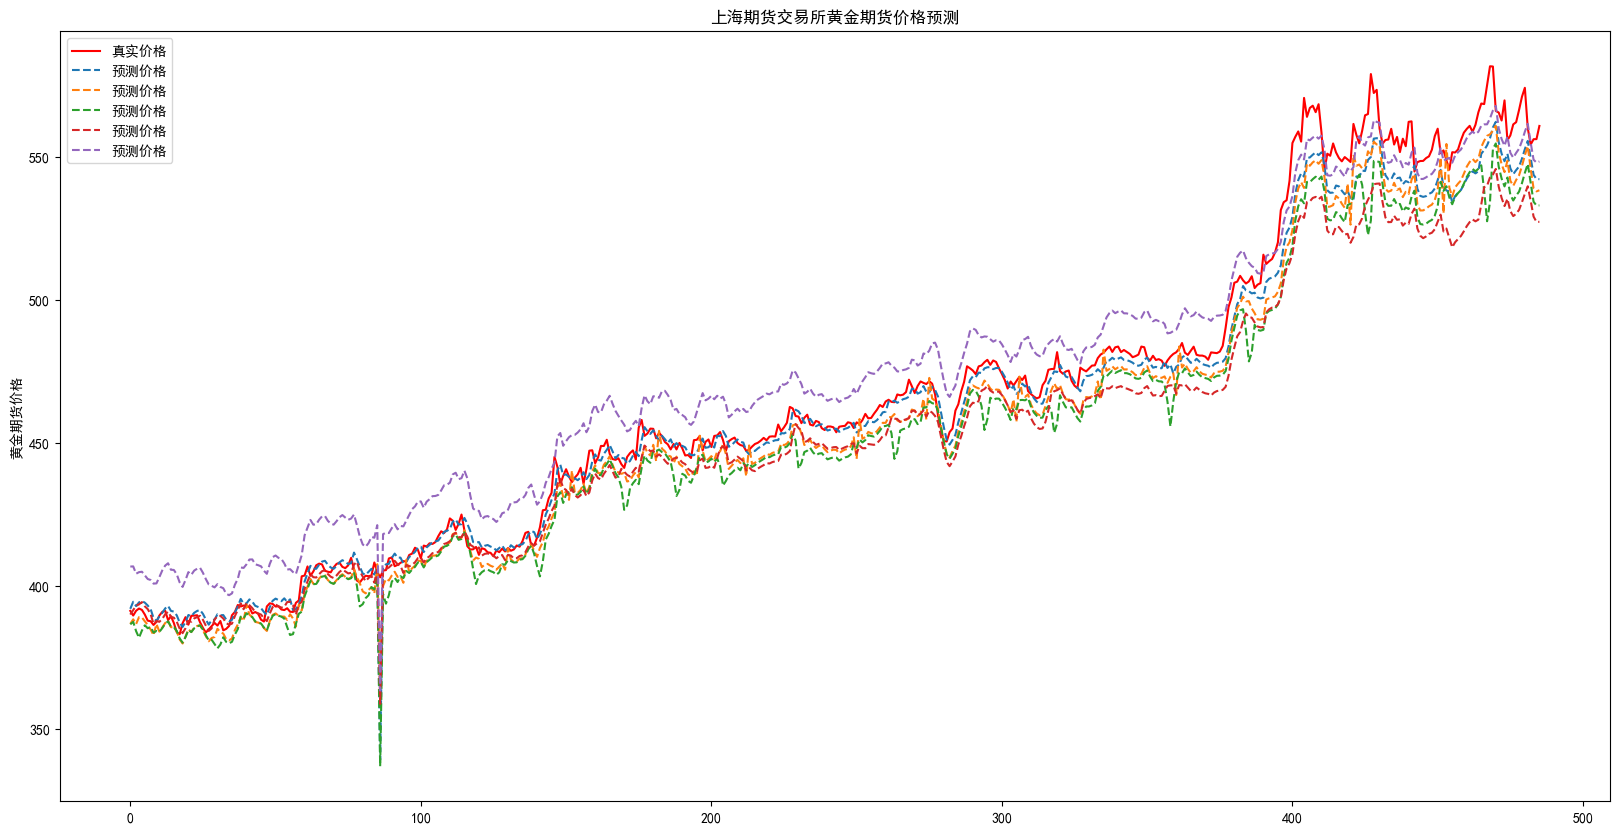

In [13]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']    #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False      #用来正常显示负号
plt.figure(figsize=(20,10))
plt.plot(np.exp(df.truth), 'r', label='真实价格')
plt.plot(np.exp(df.pred), '--', label='预测价格')
plt.title('上海期货交易所黄金期货价格预测')
plt.ylabel('黄金期货价格')
plt.legend()
plt.show()